# City population by sex, city and city type

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'City population by sex, city and city type.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df = df[:65586]                                   # select index position 0-65586. index position > 65586 contains footnotes
df

,Country or Area,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Åland Islands,2020,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2021.0,11692.0,1
1,Åland Islands,2020,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2021.0,5599.5,1
2,Åland Islands,2020,Total,Female,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2021.0,6092.0,1
3,Åland Islands,2019,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2020.0,11711.0,1
4,Åland Islands,2019,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2020.0,5606.0,1
...,...,...,...,...,...,...,...,...,...,...,...
65581,Zimbabwe,1992,Total,Male,Mutare,City proper,Census - de facto - complete tabulation,"Final figure, complete",1992.0,68413.0,NaN
65582,Zimbabwe,1992,Total,Female,Bulawayo,City proper,Census - de facto - complete tabulation,"Final figure, complete",1992.0,311878.0,NaN
65583,Zimbabwe,1992,Total,Female,Chitungwiza,City proper,Census - de facto - complete tabulation,"Final figure, complete",1992.0,137022.0,NaN
65584,Zimbabwe,1992,Total,Female,Gweru,City proper,Census - de facto - complete tabulation,"Final figure, complete",1992.0,63565.0,NaN


In [5]:
df.shape

(65586, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65586 entries, 0 to 65585
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  65586 non-null  object 
 1   Year             65586 non-null  object 
 2   Area             65586 non-null  object 
 3   Sex              65586 non-null  object 
 4   City             65586 non-null  object 
 5   City type        65586 non-null  object 
 6   Record Type      65586 non-null  object 
 7   Reliability      65586 non-null  object 
 8   Source Year      65586 non-null  float64
 9   Value            65586 non-null  float64
 10  Value Footnotes  32770 non-null  object 
dtypes: float64(2), object(9)
memory usage: 5.5+ MB


In [7]:
df.rename(columns={'Country or Area': 'Country_or_Area', 
                   'City type': 'CityType',
                   'Value': 'Population'}, inplace=True)
df.head()                

,Country_or_Area,Year,Area,Sex,City,CityType,Record Type,Reliability,Source Year,Population,Value Footnotes
0,Åland Islands,2020,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2021.0,11692.0,1
1,Åland Islands,2020,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2021.0,5599.5,1
2,Åland Islands,2020,Total,Female,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2021.0,6092.0,1
3,Åland Islands,2019,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2020.0,11711.0,1
4,Åland Islands,2019,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2020.0,5606.0,1


In [8]:
df1 = df[['Country_or_Area', 'Year', 'Sex', 'City', 'CityType', 'Population']]
df1

,Country_or_Area,Year,Sex,City,CityType,Population
0,Åland Islands,2020,Both Sexes,MARIEHAMN,City proper,11692.0
1,Åland Islands,2020,Male,MARIEHAMN,City proper,5599.5
2,Åland Islands,2020,Female,MARIEHAMN,City proper,6092.0
3,Åland Islands,2019,Both Sexes,MARIEHAMN,City proper,11711.0
4,Åland Islands,2019,Male,MARIEHAMN,City proper,5606.0
...,...,...,...,...,...,...
65581,Zimbabwe,1992,Male,Mutare,City proper,68413.0
65582,Zimbabwe,1992,Female,Bulawayo,City proper,311878.0
65583,Zimbabwe,1992,Female,Chitungwiza,City proper,137022.0
65584,Zimbabwe,1992,Female,Gweru,City proper,63565.0


In [9]:
df1.describe(include='object')

,Country_or_Area,Year,Sex,City,CityType
count,65586,65586,65586,65586,65586
unique,216,47,3,4769,2
top,Russian Federation,2010,Both Sexes,Hamilton,City proper
freq,5059,8231,24664,155,50332


In [10]:
df1['Country_or_Area'].value_counts()

Russian Federation          5059
Japan                       4422
United States of America    3938
India                       3501
Canada                      3203
                            ... 
Lesotho                        1
Comoros                        1
Chad                           1
Central African Republic       1
Barbados                       1
Name: Country_or_Area, Length: 216, dtype: int64

In [11]:
df1['Country_or_Area'].value_counts()

Russian Federation          5059
Japan                       4422
United States of America    3938
India                       3501
Canada                      3203
                            ... 
Lesotho                        1
Comoros                        1
Chad                           1
Central African Republic       1
Barbados                       1
Name: Country_or_Area, Length: 216, dtype: int64

In [12]:
df1['Year'].value_counts()

2010    8231
2011    6052
2000    4838
2001    3737
2016    3287
2015    3249
2009    3193
2007    3048
2006    2963
2012    2911
2005    2879
2008    2753
2018    2675
2017    2405
2004    2210
2003    1909
2019    1809
2013    1744
2014    1709
2020    1403
2021     594
1999     592
2002     427
1998     215
1991     213
1992     133
1996     130
1995      46
1993      41
1988      38
1987      30
2012      15
1992      14
2002      12
1997      11
1990      11
1983       9
1976       9
2010       9
1984       6
1994       6
1970       5
1986       4
1985       4
1989       3
1980       3
1981       1
Name: Year, dtype: int64

In [13]:
df1['Sex'].value_counts()

Both Sexes    24664
Male          20462
Female        20460
Name: Sex, dtype: int64

In [14]:
df1['City'].value_counts()

Hamilton              155
Maribor               114
LJUBLJANA             114
Novi Sad              102
BEOGRAD (BELGRADE)    102
                     ... 
Ugep                    1
Umuahia                 1
ST. JOHN                1
Warri                   1
Ikot Ekpene             1
Name: City, Length: 4769, dtype: int64

In [15]:
df1['CityType'].value_counts()

City proper            50332
Urban agglomeration    15254
Name: CityType, dtype: int64

# Missing Values Exploration

In [16]:
df1.isna().sum()

Country_or_Area    0
Year               0
Sex                0
City               0
CityType           0
Population         0
dtype: int64

# Grouping and Aggregation

In [17]:
country_area_grouped = df1.groupby('Country_or_Area')
country_area_grouped.head()

,Country_or_Area,Year,Sex,City,CityType,Population
0,Åland Islands,2020,Both Sexes,MARIEHAMN,City proper,11692.0
1,Åland Islands,2020,Male,MARIEHAMN,City proper,5599.5
2,Åland Islands,2020,Female,MARIEHAMN,City proper,6092.0
3,Åland Islands,2019,Both Sexes,MARIEHAMN,City proper,11711.0
4,Åland Islands,2019,Male,MARIEHAMN,City proper,5606.0
...,...,...,...,...,...,...
65545,Zimbabwe,2012,Both Sexes,Bulawayo,City proper,653337.0
65546,Zimbabwe,2012,Both Sexes,Chitungwiza,City proper,356840.0
65547,Zimbabwe,2012,Both Sexes,Gweru,City proper,91806.0
65548,Zimbabwe,2012,Both Sexes,HARARE,City proper,1485231.0


# Country_or_Area and Population Exploration

In [18]:
agg_pop_stats = country_area_grouped.agg(
    min_pop = pd.NamedAgg('Population', np.min),
    mean_pop = pd.NamedAgg('Population', np.mean),
    max_pop = pd.NamedAgg('Population', np.max),
    total_pop = pd.NamedAgg('Population', np.sum)
)

agg_pop_stats

,min_pop,mean_pop,max_pop,total_pop
Country_or_Area,,,,
Albania,56511.0,205468.222222,418495.0,1849214.0
Algeria,102151.0,394851.602564,2712944.0,30798425.0
American Samoa,2086.0,3053.000000,4278.0,12212.0
Andorra,10543.0,15728.166667,24779.0,377476.0
Anguilla,2812.0,3858.000000,4904.0,7716.0
...,...,...,...,...
Wallis and Futuna Islands,1126.0,1151.333333,1191.0,3454.0
Yemen,103312.0,682879.400000,1747934.0,6828794.0
Zambia,68763.0,285399.400000,1747152.0,8561982.0


In [19]:
agg_pop_stats['total_pop'].sort_values(ascending=False).head(10)                 # top ten country or area with the highest population

Country_or_Area
Mexico                      1.684642e+09
Russian Federation          1.433414e+09
China                       1.262169e+09
United States of America    1.238266e+09
Canada                      1.177859e+09
India                       1.119160e+09
Australia                   1.021318e+09
Japan                       1.017797e+09
Republic of Korea           7.114409e+08
Spain                       5.410185e+08
Name: total_pop, dtype: float64

In [20]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def billion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fBn ' % (x * 1e-9)

formatter = FuncFormatter(billion)


# helper function to plot horizontal bar chart 
def plot_hbar(y, width, align='center', xlabel=None, ylabel=None, title=None, color=None):

    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(
        y=y, width=width,
        align=align
    )

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    # set axis formatter
    ax.xaxis.set_major_formatter(formatter)

    # despine x-axis and y-axis
    sns.despine(left=True, bottom=True)  

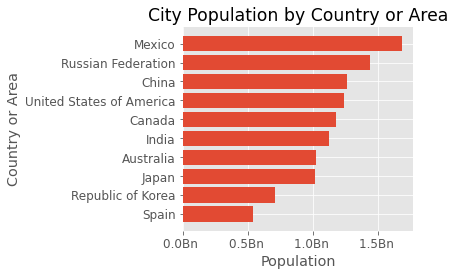

In [21]:
top_10_pop = agg_pop_stats['total_pop'].sort_values(ascending=False).head(10) 

plot_hbar(y=top_10_pop.keys(), width=top_10_pop.values, align='center', 
          xlabel='Population', ylabel='Country or Area', title='City Population by Country or Area')

In [22]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def thousand(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK ' % (x * 1e-3)

formatter1 = FuncFormatter(thousand)

# helper function to plot horizontal bar chart 
def plot_hbar1(y, width, align='center', xlabel=None, ylabel=None, title=None, color=None):

    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(
        y=y, width=width,
        align=align
    )

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set axis formatter
    ax.xaxis.set_major_formatter(formatter1)

    # despine x-axis and y-axis
    sns.despine(left=True, bottom=True)  

In [23]:
agg_pop_stats['total_pop'].sort_values(ascending=True).head(10)                 # top ten country or area with the lowest population

Country_or_Area
Nauru                                672.0
Pitcairn                            1111.0
Montserrat                          1478.0
Niue                                2474.0
Holy See                            2813.0
Wallis and Futuna Islands           3454.0
British Virgin Islands              3500.0
Saint Helena ex. dep.               5760.0
Micronesia (Federated States of)    6227.0
Barbados                            7466.0
Name: total_pop, dtype: float64

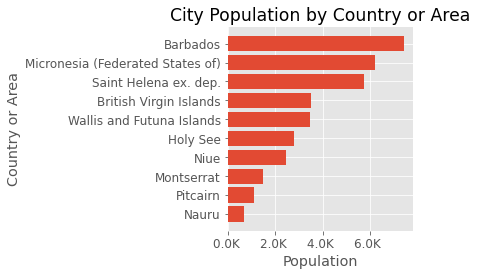

In [24]:
low_10_pop = agg_pop_stats['total_pop'].sort_values(ascending=True).head(10) 

plot_hbar1(y=low_10_pop.keys(), width=low_10_pop.values, 
          xlabel='Population', ylabel='Country or Area', title='City Population by Country or Area')

# Country_or_Area, Sex and Population Exploration

In [25]:
agg_pop_sex_stats = df1.groupby(['Country_or_Area', 'Sex']).agg(
    min_pop = pd.NamedAgg('Population', np.min),
    mean_pop = pd.NamedAgg('Population', np.mean),
    max_pop = pd.NamedAgg('Population', np.max),
    total_pop = pd.NamedAgg('Population', np.sum)
)

agg_pop_sex_stats

min_pop       mean_pop    max_pop   total_pop
Country_or_Area Sex                                                       
Albania         Both Sexes  113249.0  308202.333333   418495.0    924607.0
                Female       56738.0  156950.333333   215256.0    470851.0
                Male         56511.0  151252.000000   203239.0    453756.0
Algeria         Both Sexes  102151.0  394851.602564  2712944.0  30798425.0
American Samoa  Both Sexes    3656.0    3967.000000     4278.0      7934.0
...                              ...            ...        ...         ...
Zimbabwe        Female       46567.0  291951.615385   768636.0   3795371.0
                Male         45239.0  268562.857143   720021.0   3759880.0
Åland Islands   Both Sexes   10488.0   11305.366667    11711.0    169580.5
                Female        5545.0    5902.100000     6105.0     88531.5
                Male          4943.0    5403.233333     5620.5     81048.5

[580 rows x 4 columns]

# China Exploration

In [26]:
china_df = country_area_grouped.get_group('Mexico')
china_df

,Country_or_Area,Year,Sex,City,CityType,Population
36563,Mexico,2021,Both Sexes,Acapulco,Urban agglomeration,852622.0
36564,Mexico,2021,Both Sexes,Acayucan,Urban agglomeration,114416.0
36565,Mexico,2021,Both Sexes,Aguascalientes,Urban agglomeration,1140916.0
36566,Mexico,2021,Both Sexes,Apatzingán de la Constitución,Urban agglomeration,102362.0
36567,Mexico,2021,Both Sexes,Cabo San Lucas,Urban agglomeration,202694.0
...,...,...,...,...,...,...
39244,Mexico,2005,Female,Veracruz,Urban agglomeration,319121.0
39245,Mexico,2005,Female,Villahermosa,City proper,175121.0
39246,Mexico,2005,Female,Villahermosa,Urban agglomeration,191414.0
39247,Mexico,2005,Female,Zacatecas-Guadalupe,City proper,64434.0


In [27]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM ' % (x * 1e-6)

formatter2 = FuncFormatter(million)

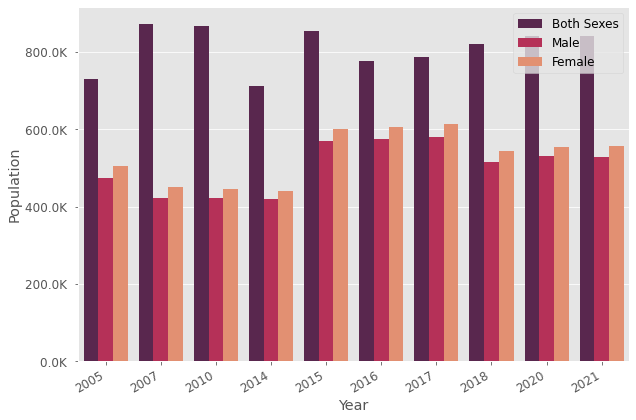

In [28]:
# initialize matplot figure
fig, ax = plt.subplots(figsize=(9, 6))
fig.autofmt_xdate()

# plot bar chart
sns.barplot(
    x='Year', y='Population',
    hue='Sex', palette='rocket', ci=None,
    data=china_df,
    ax=ax
)

# set y-axis major formatter
ax.yaxis.set_major_formatter(formatter1)

# plot legend
ax.legend(loc=1)

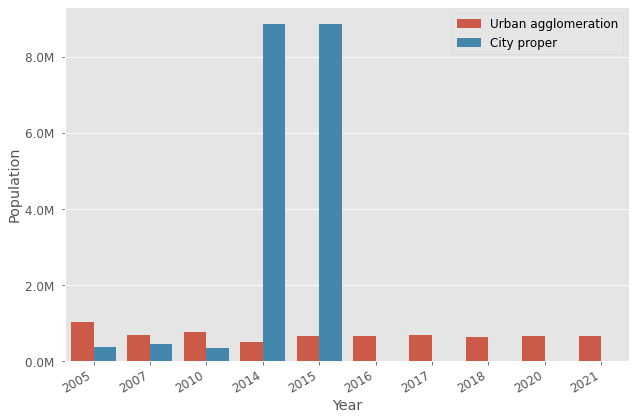

In [29]:
# initialize matplot figure
fig1, ax1 = plt.subplots(figsize=(9, 6))
fig1.autofmt_xdate()

# plot bar chart
sns.barplot(
    x='Year', y='Population',
    hue='CityType', ci=None,
    data=china_df,
    ax=ax1
)

# set y-axis major formatter
ax1.yaxis.set_major_formatter(formatter2)

# plot legend
ax1.legend(loc=1)

# Country_or_Area, City and Population Exploration

In [30]:
agg_pop_city_stats = df1.groupby(['Country_or_Area', 'City']).agg(
    min_pop = pd.NamedAgg('Population', np.min),
    mean_pop = pd.NamedAgg('Population', np.mean),
    max_pop = pd.NamedAgg('Population', np.max),
    total_pop = pd.NamedAgg('Population', np.sum)
)

agg_pop_city_stats

min_pop      mean_pop    max_pop  \
Country_or_Area City                                                       
Albania         Durrës                  56511.0  7.549933e+04   113249.0   
                TIRANA                 194006.0  2.704527e+05   418495.0   
Algeria         ALGIERS (EL DJAZAIR)  1569897.0  2.141420e+06  2712944.0   
                Adrar                  200834.0  2.008340e+05   200834.0   
                Ain Defla              450280.0  4.502800e+05   450280.0   
...                                         ...           ...        ...   
Zimbabwe        Chitungwiza            137022.0  2.105840e+05   356840.0   
                Gweru                   45239.0  8.014422e+04   140806.0   
                HARARE                 565758.0  9.133596e+05  1485231.0   
                Mutare                  68413.0  1.331200e+05   262124.0   
Åland Islands   MARIEHAMN                4943.0  7.536900e+03    11711.0   

                                      total_pop  
Country_or_Area City                             
Albania         Durrës                 226498.0  
                TIRANA                1622716.0  
Algeria         ALGIERS (EL DJAZAIR)  4282841.0  
                Adrar                  200834.0  
                Ain Defla              450280.0  
...                                         ...  
Zimbabwe        Chitungwiza           1263504.0  
                Gweru                  721298.0  
                HARARE                8220236.0  
                Mutare                1064960.0  
Åland Islands   MARIEHAMN              339160.5  

[4805 rows x 4 columns]

# Country_or_Area, CityType and Population Exploration

In [31]:
agg_pop_citytype_stats = df1.groupby(['Country_or_Area', 'CityType']).agg(
    min_pop = pd.NamedAgg('Population', np.min),
    mean_pop = pd.NamedAgg('Population', np.mean),
    max_pop = pd.NamedAgg('Population', np.max),
    total_pop = pd.NamedAgg('Population', np.sum)
)

agg_pop_citytype_stats

min_pop      mean_pop    max_pop  \
Country_or_Area CityType                                                 
Albania         City proper           56511.0  2.054682e+05   418495.0   
Algeria         City proper          102151.0  3.948516e+05  2712944.0   
American Samoa  City proper            2086.0  3.053000e+03     4278.0   
Andorra         Urban agglomeration   10543.0  1.572817e+04    24779.0   
Anguilla        City proper            2812.0  3.858000e+03     4904.0   
...                                       ...           ...        ...   
Yemen           City proper          103312.0  5.614301e+05  1707586.0   
                Urban agglomeration  589419.0  1.168676e+06  1747934.0   
Zambia          City proper           68763.0  2.853994e+05  1747152.0   
Zimbabwe        City proper           45239.0  3.700843e+05  1485231.0   
Åland Islands   City proper            4943.0  7.536900e+03    11711.0   

                                      total_pop  
Country_or_Area CityType                         
Albania         City proper           1849214.0  
Algeria         City proper          30798425.0  
American Samoa  City proper             12212.0  
Andorra         Urban agglomeration    377476.0  
Anguilla        City proper              7716.0  
...                                         ...  
Yemen           City proper           4491441.0  
                Urban agglomeration   2337353.0  
Zambia          City proper           8561982.0  
Zimbabwe        City proper          15173456.0  
Åland Islands   City proper            339160.5  

[303 rows x 4 columns]